## Accident Project Data Analysis

### Project Background Information.

All road traffic accidents involving casualties are logged and reported in Great Britain, along with (probably) a majority of other non-fatal road traffic accidents. Every year, the government releases a large batch of data associated with these reports. In this assignment we will be using the data from 2020.

Download accident_data_v1.0.0_2023.db: a sqlite database containing the accident data. You should extract data from 2020 from this database. 

https://canvas.hull.ac.uk/courses/66553/files/4661442?wrap=1

https://www.gov.uk/government/publications/road-accidents-and-safety-statistics-notes-and-definitions/reported-road-casualties-in-great-britain-notes-definitions-symbols-and-conventions

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/995422/stats19.pdf
 

The Task.
Imagine that you are a data scientist confronted with this data (this is not far from the truth!). Your task
is to advise government agencies about how to improve road safety and create a model that would predict such accidents and the injuries that they incur.


### The questions (at minimum) that the assignment should address are as follows:

Are there significant hours of the day, and days of the week, on which accidents occur?

For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

Using the apriori algorithm, explore the impact of selected variables on accident severity.  

Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 

Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data? 

Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

### Project Initialization

Importing the necessary library for the project 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import warnings
from mlxtend.frequent_patterns import fpcommon

# Filter out the DeprecationWarning from mlxtend
warnings.filterwarnings("ignore", category=DeprecationWarning, module=fpcommon.__name__)

 Establish a connection to the sqlite database. This database has been saved in the same folder directory as this notebook

In [2]:
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

Create a cursor object associated with the connection


In [3]:
cur = con.cursor()

### Data Pre - Processing

Check how many tables are in the sqlite database

In [4]:

# Query the number of tables
cur.execute("SELECT count(*) FROM sqlite_master WHERE type='table'")
result = cur.fetchone()

# Print the number of tables
num_tables = result[0]
print(f"The database contains {num_tables} tables.")


The database contains 4 tables.


In [5]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
result = cur.fetchall()

# Print the table names
print("The Tables are:")
print("==============>")
for table in result:
    print(table[0])

The Tables are:
==============>
accident
casualty
vehicle
lsoa


Create a list to store the column headers and create a dictionary to hold the table name and the respective column names(list) for each table. These steps will help make data pre-processing easier

In [6]:
# Lists to hold column names for each table
accident_cols = []
vehicle_cols = []
casualty_cols = []
lsoa_cols = []

# List to hold data for each table
accident_data_2020 = []
vehicle_data_2020 = []
casualty_data_2020 = []
lsoa_data_2020 = []

# Dictionary to link each table and their column names
tables = {'accident':accident_cols,
          'vehicle':vehicle_cols, 
          'casualty': casualty_cols,
          'lsoa': lsoa_cols}

# Dictonary to link each table and their data
table_data_2020 = {'accident':accident_data_2020,
          'vehicle':vehicle_data_2020, 
          'casualty': casualty_data_2020,
          'lsoa': lsoa_data_2020}

Create a function to get the column names for each table

In [7]:
# Function to get column names
def get_column_names(table):
    statement  = "PRAGMA table_info("+table+")"
    col_info = cur.execute(statement)
    columns = col_info.fetchall()
    return columns

Use the function to store the column names using the dictionary and list created earlier

In [8]:
# Function to extract column names from Data base to python list
for table,table_col_names in tables.items():
    columns = get_column_names(table)
    for count, column in enumerate(columns): 
        table_col_names.append(column[1])

Check lists to see the column headers for each table

In [9]:
print(accident_cols)
print("=========")
print("=========")
print("=========")
print(vehicle_cols)
print("=========")
print("=========")
print("=========")
print(casualty_cols)
print("=========")
print("=========")
print("=========")
print(lsoa_cols)


['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']
['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle

Extract data for the year 2020 from the dataset as this is the focus of our analysis for this project. 

Make each sqlite table a padas dataframe. However, this does not apply to the lsoa table as it dooes not have any time componenet.

In [10]:
# Extract each table from sqlite db to Pandas list using dictionary created earlier.
for table,data in table_data_2020.items():
    print(f" The {table} table has been extracted successfully.")
    if table == 'lsoa':
        statement  = "Select * from " + table
        data_ = cur.execute(statement)
        data_ = data_.fetchall()
        data.append(data_)
    else:        
        statement  = "Select * from " + table + " where accident_year = 2020"
        data_ = cur.execute(statement)
        data_ = data_.fetchall()
        data.append(data_)
    

 The accident table has been extracted successfully.
 The vehicle table has been extracted successfully.
 The casualty table has been extracted successfully.
 The lsoa table has been extracted successfully.


Convert these lists(extracted data) to data frames

In [11]:
accident_2020_df = pd.DataFrame(accident_data_2020[0], columns = accident_cols)
vehicle_2020_df = pd.DataFrame(vehicle_data_2020[0], columns = vehicle_cols)
casualty_2020_df = pd.DataFrame(casualty_data_2020[0], columns = casualty_cols)
lsoa_2020_df = pd.DataFrame(lsoa_data_2020[0], columns = lsoa_cols)

Validate each data frame created

In [12]:
#Print the accident dataframe to visualize
accident_2020_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [13]:
#Print the Casualty dataframe to visualize
casualty_2020_df

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [14]:
#Print the Vehicle dataframe to visualize
vehicle_2020_df

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [15]:
#Print the lsoa dataframe to visualize
lsoa_2020_df

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


That marks the end of the Pre-processing steps

### Data Cleaning 

Investigate properties of all the data frames created

In [16]:
accident_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [17]:
casualty_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [18]:
vehicle_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [19]:
lsoa_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


From preliminary analysis, The accident data has a few null values.


Check for other problematic values as NaN, positive infinity (np.inf), negative infinity (-np.inf), empty strings (' '), question marks ('?'), and equal signs ('=') in all the data frames

In [20]:
# Create dictionary to hold each dataframe and their names
dfs = {'casuality': casualty_2020_df ,
       'vehicle': vehicle_2020_df,
       'lsoa':lsoa_2020_df,
       'accident':accident_2020_df}
       

# Create loop to using dictionary created earlier to check for problematic values 
for df_name, df in dfs.items():
    problematic_rows = df.isin([np.nan, np.inf, -np.inf, ' ', '?', '=']).any(axis=1)
    problematic_indices = df[problematic_rows].index
    print('=========================')
    print(df_name)
    print('=========================')
    print(problematic_indices)


casuality
Int64Index([], dtype='int64')
vehicle
Int64Index([], dtype='int64')
lsoa
Int64Index([], dtype='int64')
accident
Int64Index([25520, 29452, 32689, 33578, 81252, 86437, 86642, 86651, 86668,
            86705, 86785, 87018, 87030, 87296],
           dtype='int64')


It appears only the accident data has some defects from our preliminary analysis. There are the null values which have been detected earlier

Investigate the null and problematic rows from our accident dataframe 

In [21]:
# Visualize problematic rows
accident_2020_df.iloc[problematic_indices]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
25520,2020052002442,2020,052002442,NaN,NaN,NaN,NaN,5,2,2,...,0,1,1,1,0,0,3,1,2,-1
29452,2020070769852,2020,070769852,NaN,NaN,NaN,NaN,7,3,2,...,0,1,1,1,0,0,3,1,2,-1
32689,2020122001194,2020,122001194,NaN,NaN,NaN,NaN,12,3,2,...,0,1,2,2,0,0,3,1,2,-1
33578,2020137330369,2020,137330369,NaN,NaN,NaN,NaN,13,3,2,...,0,1,1,1,0,0,3,1,1,-1
81252,2020522005114,2020,522005114,NaN,NaN,NaN,NaN,52,3,3,...,0,7,1,1,0,0,3,1,2,-1
86437,2020622001016,2020,622001016,NaN,NaN,NaN,NaN,62,3,2,...,5,4,1,1,0,0,3,1,-1,-1
86642,202063A017520,2020,63A017520,NaN,NaN,NaN,NaN,63,3,2,...,0,1,9,-1,0,0,3,2,-1,-1
86651,202063A018920,2020,63A018920,NaN,NaN,NaN,NaN,63,3,2,...,0,1,9,1,0,0,3,2,-1,-1
86668,202063A025020,2020,63A025020,NaN,NaN,NaN,NaN,63,3,2,...,0,1,2,2,0,0,3,2,-1,-1
86705,202063A035620,2020,63A035620,NaN,NaN,NaN,NaN,63,3,1,...,0,1,1,1,0,0,3,2,-1,-1


From the table above, the accident data has only 14 rows with null values which span 4 columns.

The accident dataframe has 91199 rows. 14 out of 91199 are problematic. That is about 0.0002% of the dataset. 

Due to the neglible amount of null values, drop these problematic rows.

In [22]:
# Drop null values which is 0.0002% of dataset
accident_2020_df = accident_2020_df.dropna()

Repeat the check for problematic values

In [23]:
dfs = {'casuality': casualty_2020_df ,
       'vehicle': vehicle_2020_df,
       'lsoa':lsoa_2020_df,
       'accident':accident_2020_df}

for df_name, df in dfs.items():
    problematic_rows = df.isin([np.nan, np.inf, -np.inf, ' ', '?', '=']).any(axis=1)
    problematic_indices = df[problematic_rows].index
    print('=========================')
    print(df_name)
    print('=========================')
    print(problematic_indices)

casuality
Int64Index([], dtype='int64')
vehicle
Int64Index([], dtype='int64')
lsoa
Int64Index([], dtype='int64')
accident
Int64Index([], dtype='int64')


It appears all the problematic data revealed by our preliminary analysis have been solved.


This marks the end of the general data cleaning efforts.

However as we proceed to analytics, data quality checks will be performed before each analysis. There are numerous column available in the combined dataset. It is best to focus cleaning efforts on only required features. 

So more cleaning and some feature engineering will happen but under the analysis section.

### Data Analysis

#### Question 1


Are there significant hours of the day, and days of the week, on which accidents occur?


This question is two fold. There is need perfrom analysis with respect to days of the week and hours of the day. 

This will requires extraction of the hour ranges from the data.

Also, health check will be perfromed on the column of interest to ascertain the data for this analysis is clean.

In [24]:

# Extract hour from the time format
accident_2020_df['hour_range'] = accident_2020_df['time'].str.split(':').str[0].astype(int)

# Create hour ranges
accident_2020_df['hour_range'] = accident_2020_df['hour_range'].astype(str) + '-' + (accident_2020_df['hour_range']+1).astype(str)

# Update the DataFrame with hour ranges
accident_2020_df['hour_range'] = accident_2020_df['hour_range'].str.replace('24', '00')


Health check on hour range data before analysis. There should be 24 ranges for the 24 hours of the day

In [25]:
#Show unique values to be sure we have no absurd range
accident_2020_df['hour_range'].unique()

array(['9-10', '13-14', '1-2', '2-3', '3-4', '4-5', '5-6', '10-11', '8-9',
       '14-15', '16-17', '15-16', '19-20', '18-19', '17-18', '20-21',
       '23-00', '6-7', '22-23', '11-12', '12-13', '21-22', '7-8', '0-1'],
      dtype=object)

Health check on day data  before analysis. There should be 7 unique calues for each day of the week

In [26]:
#Show unique values to be sure we have no absurd day entry
accident_2020_df['day_of_week'].unique()

array([3, 2, 4, 5, 6, 7, 1], dtype=int64)

Considering our days are 1 - 7, map those values to actual days like Monday, Tuesday, etc.

I made the assumption that the week starts from Monday as is normal custom in the United Kindgom (https://www.timeanddate.com/calendar/days/first-day-of-the-week.html)

In [27]:
# Custom function to assign days based on value:

def assign_days(number):
    number_mapping = {
         
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday',
        7: 'Sunday'
                        }
    return number_mapping.get(number, None)


Create a new column to hold the days of the week in text

In [28]:
# Add day of the week in text to dataframe
accident_2020_df['day_of_week_string'] = accident_2020_df['day_of_week'].apply(assign_days)

Create the graph to answer the question: Are there significant hours of the day on which accident occurs.


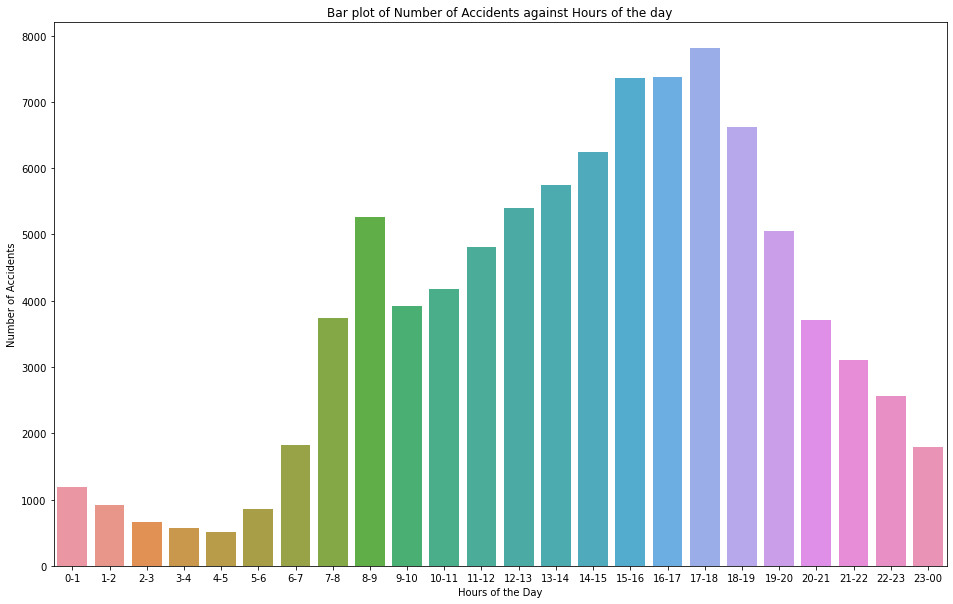

In [29]:
# Give my figure a size
plt.figure(figsize=(16, 10))

# Arrange my hours of the day so it follows a sequence in my graph
category_order = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00']

# Plot graph
sns.countplot(data = accident_2020_df, x = 'hour_range', order=category_order)
plt.title("Bar plot of Number of Accidents against Hours of the day")
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Accidents")

# Display graphe
plt.show()

Create the graph to answer the question: Are there days of the week on which accident occurs.


In [30]:
# Checking the accident count of each days for analytical purposes
accident_2020_df['day_of_week_string'].value_counts()

Saturday     14886
Friday       14054
Thursday     13559
Wednesday    13266
Tuesday      12772
Sunday       12334
Monday       10314
Name: day_of_week_string, dtype: int64

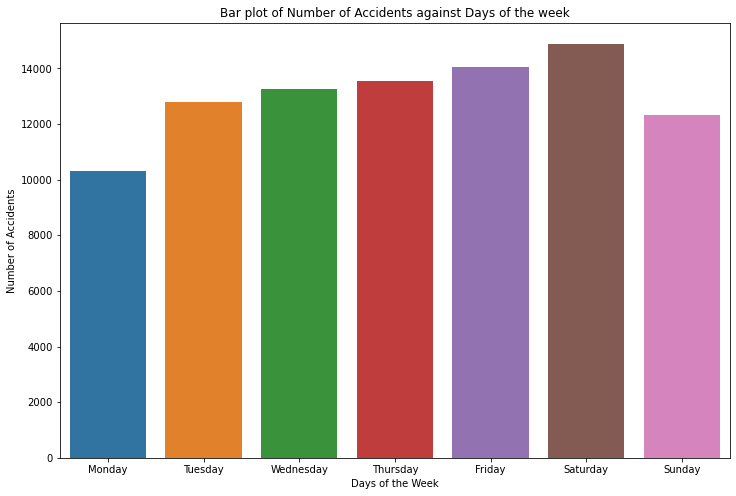

In [31]:
# Give my figure a size
plt.figure(figsize=(12, 8))

# Arrange my days of the week so it follows a sequence in my graph
category_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot graph
sns.countplot(data = accident_2020_df, x = 'day_of_week_string', order=category_order)
plt.title("Bar plot of Number of Accidents against Days of the week")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Accidents")

# Display  plot
plt.show()

#### Question 2


For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.


This is also a two fold question. There is need to perfrom analysis with respect to days of the week and hours of the day. 

This will requires extraction of motorcycle ranges from the data.
Hour ranges and days of the week in text have already been added to the main accident_2020_df data frame.

Also, health check will be performed on the column of interest to ascertain the data for this analysis is clean.

In [32]:
# Health check on vehicle type data  before analysis.
vehicle_2020_df['vehicle_type'].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

All the expected vehicle types are present. There is no absurd or inappropriate entry. No cleaning is required here. This numbers follow the column nomenclature provided.

Now we need to join out accident table to the vehicle table. This is because the vehicle table contains information on vehicle types. After joining, we can check for accidents with a certain vehicle type.

In [33]:
# Joining the accident and vehicle tables based on accident index
merged_vehicle_df = pd.merge(vehicle_2020_df, accident_2020_df,  on='accident_index', how='left')

# Selecting columns of interest after joining
merged_vehicle_df_cc = merged_vehicle_df[['hour_range','day_of_week','vehicle_type','day_of_week_string']]

Since the question mentioned a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc, extract information on these categories from the newly created data frame.

2 - 50cc and under

3 - Over 50cc and up to 125cc

4 - Over 125cc and up to 500cc

5 - Over 500cc

In [34]:
# Extracting data on relevant categories
merged_vehicle_df_cc = merged_vehicle_df_cc[merged_vehicle_df_cc['vehicle_type'].isin([2,3,4,5])]

In [35]:
# Checking properties of newly created data frame
merged_vehicle_df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14126 entries, 12 to 167371
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hour_range          14122 non-null  object 
 1   day_of_week         14122 non-null  float64
 2   vehicle_type        14126 non-null  int64  
 3   day_of_week_string  14122 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 551.8+ KB


Create a function to assign a motorcycle category in string based on values

In [36]:
# Custom function to assign Motocycle type based on values
def assign_motorcycle_type(score):
    if score == 2 or score == 3 :
        return '125cc and Under'
    elif score == 4 or score == 3 :
        return 'Over 125cc to 500cc'
    else:
        return 'Over 500cc'


Update data frame with new column of motorcycle category in string using function created above

In [37]:
# Adding new dataframe with motorcycle category in string
merged_vehicle_df_cc['vehicle_type_adj'] = merged_vehicle_df_cc['vehicle_type'].apply(assign_motorcycle_type)

Create the graph to answer the question: Are there significant days of the week on which accident occur for motorbikes


In [38]:
# Checking the accident count of each days for analytical purposes
merged_vehicle_df_cc['vehicle_type_adj'].value_counts()

125cc and Under        8651
Over 500cc             3784
Over 125cc to 500cc    1691
Name: vehicle_type_adj, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


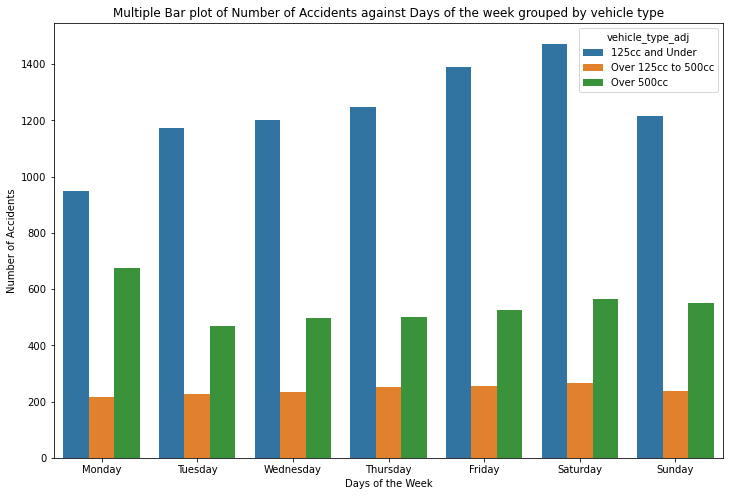

In [39]:
# Give my figure a size
plt.figure(figsize=(12, 8))

# Arrange my days of the week so it follows a sequence in my graph
category_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot graph
sns.countplot(x ='day_of_week_string', hue = "vehicle_type_adj", data = merged_vehicle_df_cc, order=category_order)
plt.title("Multiple Bar plot of Number of Accidents against Days of the week grouped by vehicle type")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Accidents")

# Display graph
plt.show()


Create the graph to answer the question: Are there significant hours of the day on which accident occur for motorbikes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


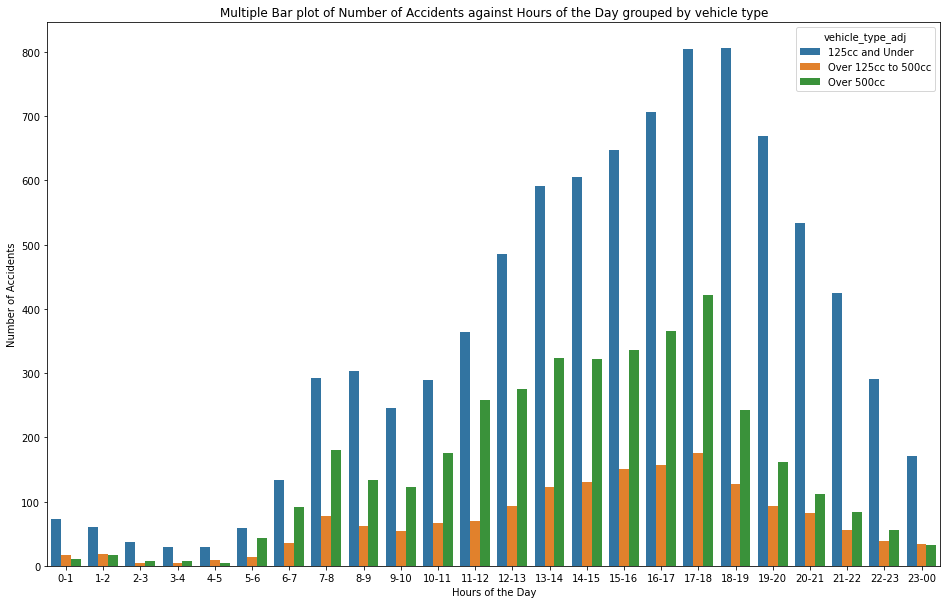

In [40]:
# Give my figure a size
plt.figure(figsize=(16, 10))

# Arrange my days of the week so it follows a sequence in my graph
category_order = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00']

# Plot graph
sns.countplot(x ='hour_range', hue = "vehicle_type_adj", data = merged_vehicle_df_cc, order=category_order)
plt.title("Multiple Bar plot of Number of Accidents against Hours of the Day grouped by vehicle type")
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Accidents")

# Display graph
plt.show()

#### Question 3


For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

This is also a two fold question. There is need to perfrom analysis with respect to days of the week and hours of the day. 

This will requires joining the accident table with the casualty table to get pedestrain information. 

Also, health check will be performed on the column of interest to ascertain the data for this analysis is clean.

In [41]:
# Health check on casualty data
casualty_2020_df['casualty_class'].unique()

array([3, 1, 2], dtype=int64)

All the expected casualty classes are present. There is no absurd or inappropriate entry. No cleaning is required here. This numbers follow the column nomenclature provided.

Now we need to join out accident table to the casualty table. This is because the casualty table contains information on casualty class. After joining, we can check for accidents with pedestrians involved.

In [42]:
# Joining the accident and casualty tables based on accident index
merged_casualty_df = pd.merge(casualty_2020_df, accident_2020_df,  on='accident_index', how='left')

# Selecting columns of interest after joining
merged_casualty_df_pedes = merged_casualty_df[['hour_range','day_of_week','casualty_class','day_of_week_string']]

Since the question mentioned a focus on pedestrian, extract information on this category from the newly created data frame.

Note:  
3 - Passenger

In [43]:
# Extracting data on relevant categories
merged_casualty_df_pedes = merged_casualty_df_pedes[merged_casualty_df_pedes['casualty_class'].isin([3])]

In [44]:
# Checking the properties of the newly created dataframe
merged_casualty_df_pedes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14750 entries, 0 to 115583
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hour_range          14750 non-null  object 
 1   day_of_week         14750 non-null  float64
 2   casualty_class      14750 non-null  int64  
 3   day_of_week_string  14750 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 576.2+ KB


Create the graph to answer the question: Are there significant days of the week on which accident occur for pedestrian

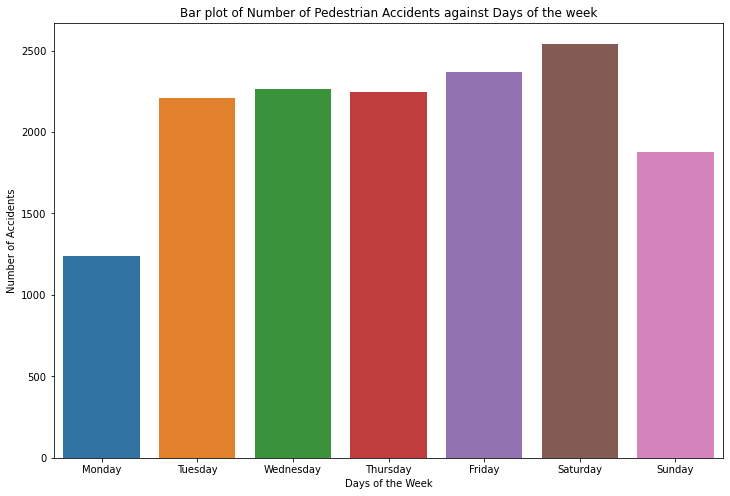

In [45]:
# Give my figure a size
plt.figure(figsize=(12, 8))

# Arrange my days of the week so it follows a sequence in my graph
category_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot graph
sns.countplot(x ='day_of_week_string',  data = merged_casualty_df_pedes, order=category_order)
plt.title("Bar plot of Number of Pedestrian Accidents against Days of the week")
plt.xlabel("Days of the Week")
plt.ylabel("Number of Accidents")

# Display graph
plt.show()

Create the graph to answer the question: Are there hours of the day which accident occur for pedestrian

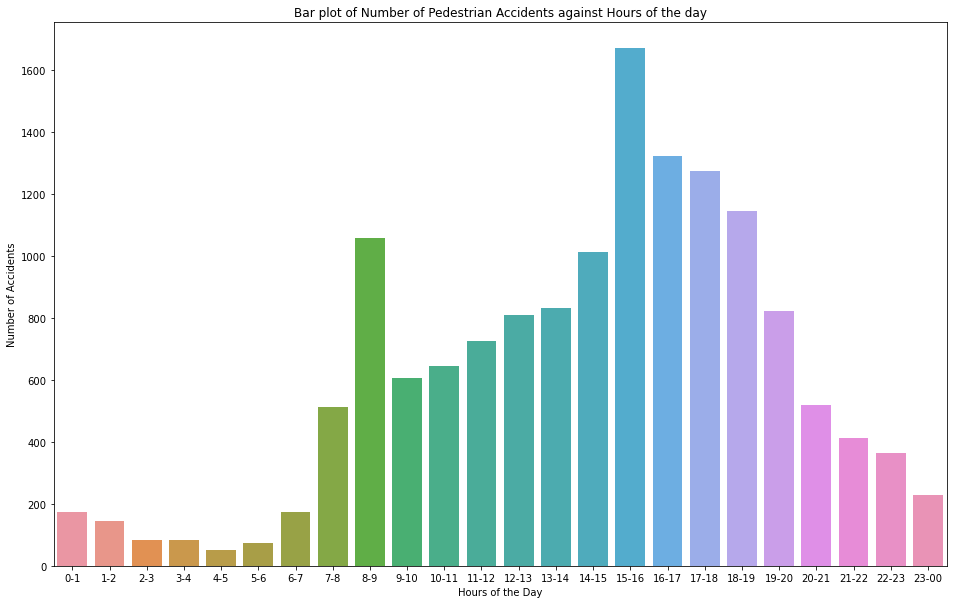

In [46]:
# Give my figure a size
plt.figure(figsize=(16, 10))

# Arrange my days of the week so it follows a sequence in my graph
category_order = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00']

# Plot graph
sns.countplot(x ='hour_range', data = merged_casualty_df_pedes, order=category_order)
plt.xlabel("Hours of the Day")
plt.title("Bar plot of Number of Pedestrian Accidents against Hours of the day")
plt.ylabel("Number of Accidents")

# Display graph
plt.show()

#### Question 4


Using the apriori algorithm, explore the impact of selected variables on accident severity.  

Import the necessary library for this task

In [47]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

The impact of the selected variables: speed_limit, weather_condition and urban_or_rural_area will be measured on accident_severity

Each of these variables will be inspected to be sure of the data quality

In [48]:
# Inspect the unique values in the speed-limit column
accident_2020_df['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

It appears the speed_limit data has an appropriate entry which is -1.

Check how many entries have -1.

In [49]:
# Check for problematic rows with entry -1
problematic_rows = accident_2020_df['speed_limit'].isin([-1])

# Store the indexes for the problematic column
problematic_indices = df[problematic_rows].index

print('=========================')
print("Problematic indexes of speed_limit")
print('=========================')
print(problematic_indices)
print('=========================')
print("The number of problematic records are: ",len(problematic_indices))

Problematic indexes of speed_limit
Int64Index([ 1993,  5381, 16520, 18039, 18264, 18487, 20496, 31115, 47041,
            53894, 55920, 68361],
           dtype='int64')
The number of problematic records are:  12


Replace the problematic entries with the mode of the column - Data cleaning. 

In [50]:
# Replace the -1 values with the mode of the column for the speed_limit column
accident_2020_df['speed_limit'] = accident_2020_df['speed_limit'].replace(-1, accident_2020_df['speed_limit'].mode()[0])

The speed_limit column is fine. Now inspect the weather condition column for problematic entries.

In [51]:
# Checking the unique values of the weather_conditions column
accident_2020_df['weather_conditions'].unique()

array([ 9,  1,  8,  7,  2,  4,  5,  3,  6, -1], dtype=int64)

It appears the weather_conditions data has an appropriate entry which is -1.

Check how many entries have -1.

In [52]:
# Check for problematic rows with entry -1
problematic_rows = accident_2020_df['weather_conditions'].isin([-1])

# Store the indexes for the problematic column
problematic_indices = df[problematic_rows].index

print('=========================')
print("Problematic indexes of weather_conditions")
print('=========================')
print(problematic_indices)
print('=========================')
print("The number of problematic records are: ",len(problematic_indices))

Problematic indexes of weather_conditions
Int64Index([79777], dtype='int64')
The number of problematic records are:  1


Replace the problematic entries with the mode of the column - Data cleaning. 

In [53]:
# Replace the -1 values with the mode of the column for the speed_limit column
accident_2020_df['weather_conditions'] = accident_2020_df['weather_conditions'].replace(-1, accident_2020_df['weather_conditions'].mode()[0])

The weather_conditions column is fine. Now inspect the accident_severity column.

In [54]:
# Checking the unique values of the accident_severity column
accident_2020_df['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

The accident severity column checks out fine. Now inspect the last column urban_or_rural_area

In [55]:
# Checking the unique values of the urban_or_rural_area column
accident_2020_df['urban_or_rural_area'].unique()

array([1, 2], dtype=int64)

All the necessary columns for this task have been cleaned appropriately. Now perform the Apriori Task.

Start by creating a dataframe with the required columns as described earlier

In [56]:
# Create a new dataframe with the required columns
accident_2020_df_apriori = accident_2020_df[['accident_severity', 'speed_limit', 'weather_conditions','urban_or_rural_area']]

Perform one-hot encoding 

In [57]:
# One-hot Encoding for each column
accident_severity_df = pd.get_dummies(accident_2020_df_apriori.accident_severity, prefix = "severity")
accident_speed_df = pd.get_dummies(accident_2020_df_apriori.speed_limit, prefix = "speed")
accident_weather_df = pd.get_dummies(accident_2020_df_apriori.weather_conditions, prefix = "weather")
accident_urban_or_rural_df = pd.get_dummies(accident_2020_df_apriori.urban_or_rural_area, prefix = "urban_or_rural")

# Merge dtaaframes to one dataframe
accident_merged_df = pd.concat([accident_severity_df, accident_speed_df, accident_weather_df, accident_urban_or_rural_df], axis=1)


Use Apriori algorithm on merged dataframe and explore association

In [58]:
# Applying Apriori
accident_df_freq = apriori(accident_merged_df, min_support = 0.05, use_colnames = True)

Define association rules to explore rules in the dataset

In [59]:
# First association rule of confindence greater than 0.2
accident_rules = association_rules(accident_df_freq, metric="confidence", min_threshold = 0.2 )

In [60]:
# Create a column to count consequent items
accident_rules['consequents_length'] = accident_rules['consequents'].apply(lambda x:len(x))

# Second association rule to limit the result to severity consequents
target_string = "severity"
filtered_accident_rules = accident_rules[accident_rules['consequents'].astype('str').str.contains(target_string, case=False)]

In [61]:
# Third association to limit the count of the items in the consequent column to 1 item.
filtered_accident_rules[(filtered_accident_rules['lift']>=1.05) & (filtered_accident_rules['consequents_length']==1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,consequents_length
4,(urban_or_rural_2),(severity_2),0.322948,0.201272,0.080474,0.249185,1.238050,0.015473,1.063814,0.283993,1
6,(speed_20),(severity_3),0.122630,0.783473,0.103328,0.842604,1.075473,0.007251,1.375684,0.079985,1
44,"(weather_1, urban_or_rural_2)",(severity_2),0.248221,0.201272,0.063410,0.255456,1.269209,0.013450,1.072775,0.282141,1
49,"(speed_20, weather_1)",(severity_3),0.093974,0.783473,0.078577,0.836154,1.067240,0.004951,1.321523,0.069538,1
52,"(speed_20, urban_or_rural_1)",(severity_3),0.118199,0.783473,0.100115,0.847003,1.081088,0.007509,1.415237,0.085060,1
95,"(weather_2, urban_or_rural_1)",(severity_3),0.084082,0.783473,0.069255,0.823660,1.051293,0.003379,1.227893,0.053269,1
126,"(speed_20, weather_1, urban_or_rural_1)",(severity_3),0.090475,0.783473,0.075999,0.840000,1.072149,0.005114,1.353293,0.073988,1


#### Question 5

Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 

Use the police_force to filter accidents that happened within the regiong mentioned above.

Note:      
police_force = 16 for these regions

In [62]:
# Filter accident data according to the requirements above
accident_2020_df_hum = accident_2020_df[accident_2020_df["police_force"] == 16]

Extract the region information (latitude and longitude) from the filtered data set. This will be used for clustering

In [63]:
# Extract latitude and longitude
accident_2020_df_hum_loc = accident_2020_df_hum[['longitude','latitude']]

The latitude and longitude data have already been cleaned in the preliminary data cleaning steps.  

Begin clustering by importing the necessary libraries

In [64]:
from sklearn.cluster import KMeans
import folium
from folium import plugins


Determine the number of clusters needed using the elbow method

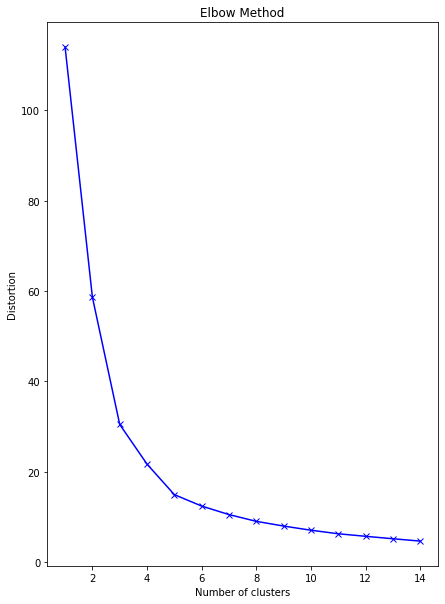

In [65]:
# List to save distance between each data point in a cluster and the cluster mean
distortions = [] 

plt.figure(figsize=(7, 10))

# Measure distortions
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(accident_2020_df_hum_loc) # fit the scaled data
    distortions.append(kmeans.inertia_)
    
# Plot elbow method graph
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

From the graph above, using the elbow method k = 4. 

Proceed to clustering!

In [66]:
# Instantiate Kmeans model
kmeans = KMeans(n_clusters = 5)

# Fit regional data to model
kmeans.fit(accident_2020_df_hum_loc)

# Save cluster coordinates for visualization 
centroids = kmeans.cluster_centers_

Visualize clustering

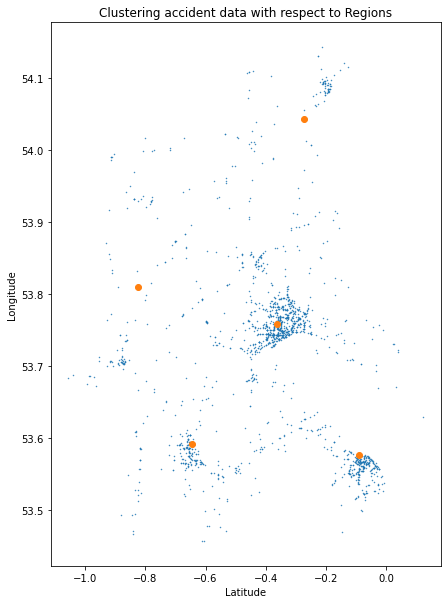

In [67]:
# Declare image size
plt.figure(figsize=(7,10))

# Plot individual coordinate points
plt.scatter(accident_2020_df_hum_loc["longitude"], accident_2020_df_hum_loc["latitude"], s=0.2 )

# Plot Cluster points
plt.scatter(centroids[:,0], centroids[:,1])

# Label graph
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.title("Clustering accident data with respect to Regions")

# Display graph
plt.show()


Visualize clustering on real world map

In [68]:
# Find the mean latitude and longitude values
center_lat = accident_2020_df_hum_loc["latitude"].mean()
center_lon = accident_2020_df_hum_loc["longitude"].mean()

# Use this to instantiate a map
map_ = folium.Map(location=[center_lat, center_lon], zoom_start=10, width='100%', height='100%')

# Create a marker cluster for identifying cluster points
marker_cluster = plugins.MarkerCluster().add_to(map_)

# Plot scatter points on real world map
for lat, lon in zip(accident_2020_df_hum_loc["latitude"], accident_2020_df_hum_loc["longitude"]):
    folium.CircleMarker(location=[lat, lon], radius=1, color='blue').add_to(map_)

# Convert centroid data to dataframe
df = pd.DataFrame(centroids, columns=['longitude', 'latitude'])

# Plot cluster points on real world map 
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='red', icon_size=(30, 30))
    ).add_to(marker_cluster)

# Save plot
map_.save('my_map.html')

# Display plot
map_

#### Question 6

Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data? 

Import  the necessary libraries for this task

In [69]:
from sklearn.ensemble import IsolationForest

Outlier detection using the Isolation Forests method.

Start by creating a new dataframe with only numerical columns

In [70]:
# selecting numeric columns from main data set
accident_2020_df_iso = accident_2020_df.select_dtypes([np.number])

Initialize the isolation forest class

In [71]:
iforest = IsolationForest(contamination = 0.0005)

Fit the isolation forest to accident_2020_df_iso df containing just numerical data

In [72]:
iforest = iforest.fit(accident_2020_df_iso)

Run the “predict” method on the data frame to get an array with flags indicating if
the data point is an outlier or not. 

In [73]:
# Run the "predict" method to get outlier flags
outliers = iforest.predict(accident_2020_df_iso)

Add a new column to the data series to help with filtering based on if a record is an outlier

In [74]:
#adding new column to detect outliers
accident_2020_df_iso["Outlier"] = outliers

In [75]:
# Filtering data set based on outlier criteria
acc_out_if_df = accident_2020_df_iso[accident_2020_df_iso["Outlier"] == -1]

In [76]:
num_outliers = len(acc_out_if_df)
print("Number of outliers:", num_outliers)

Number of outliers: 46


Visualise Outliers using longitudinal and Latitude data

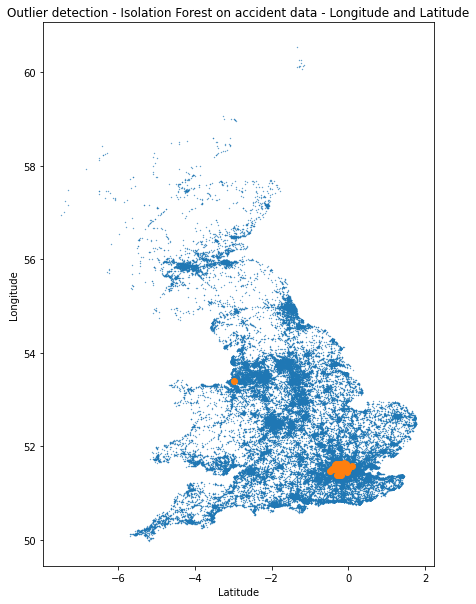

In [77]:
# Declare image size
plt.figure(figsize=(7,10))

# Plot latitude and longititude points
plt.scatter(accident_2020_df_iso["longitude"], accident_2020_df_iso["latitude"], s=0.1 )

# Plot outlier points
plt.scatter(acc_out_if_df["longitude"], acc_out_if_df["latitude"])

# Label graph
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.title("Outlier detection - Isolation Forest on accident data - Longitude and Latitude")

# Display graph
plt.show()


Visualise Outliers using Number of Vehicles and Casualties 

In [78]:
# Create dataframe for new outlier check
accident_2020_veh_cau = accident_2020_df[["number_of_vehicles","number_of_casualties"]]

In [79]:
# Create isolation forest and save
isolation_forest = IsolationForest(contamination=0.0015)

In [80]:
#Fit data frame
isolation_forest.fit(accident_2020_veh_cau)

IsolationForest(contamination=0.0015)

In [81]:
# Run the "predict" method to get outlier flags
outlier_flags = isolation_forest.predict(accident_2020_veh_cau)

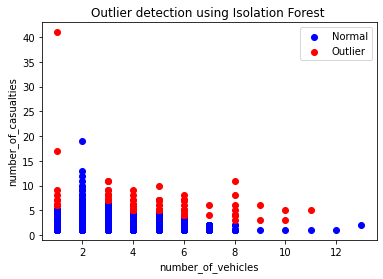

In [82]:
# Extract vehicle number and casualty number columns
vehicle_num = accident_2020_df_iso["number_of_vehicles"]
casualty_num = accident_2020_df_iso["number_of_casualties"]

# Create scatter plot
plt.scatter(vehicle_num[outlier_flags == 1], casualty_num[outlier_flags == 1], color='blue', label='Normal')
plt.scatter(vehicle_num[outlier_flags == -1], casualty_num[outlier_flags == -1], color='red', label='Outlier')

# Label scatter plot
plt.xlabel("number_of_vehicles")
plt.ylabel("number_of_casualties")
plt.title("Outlier detection using Isolation Forest ")
plt.legend()
plt.show()

### Question 7


Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?


Importing the necessary library for classification task

In [83]:
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # importing the linear regression libr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

Accident Severity is the target feature. There are 3 possible severity outcomes of an accident (1-fatal, 2-serious, 3-slight).

For this classification task, both serious and slight will be treated as one class to prevent disagreement on definitions of serious and slight accidents


In [84]:
# Make the dinstinction
accident_2020_label = accident_2020_df["accident_severity"] == 1

In [85]:
# Investigate the split dataset
accident_2020_label.value_counts()

False    89794
True      1391
Name: accident_severity, dtype: int64

From the investigation above, the dataset looks unbalanced as there is more data for non-fatal accidents when compared to fatal accidents. 

We will need to balance the dataset

In [86]:
# Create an instance of the RandomUnderSampler
random_sampler = RandomUnderSampler(random_state=42)

In [87]:
# Balance dataset
accident_2020_df_res, accident_2020_label_res = random_sampler.fit_resample(accident_2020_df, accident_2020_label)

Drop accident_severity which is the target variable from the main data frame.


Drop did_police_officer_attend_scene_of_accident column. Police officers
are more likely to attend an accident if it is fatal, and we are interested in the causes
of fatal accidents not how the police respond after the event. 

Keep only numerical columns in the dataframe as these columns support analysis

In [88]:
# Drop accident_severity
accident_2020_df_res.drop('accident_severity', axis=1, inplace=True)

# Drop did_police_officer_attend_scene_of_accident
accident_2020_df_res.drop('did_police_officer_attend_scene_of_accident', axis=1, inplace=True)

# Drop non-numerical columns
accident_2020_df_res_num = accident_2020_df_res.select_dtypes([np.number])

Perform feature selection using SelectKBest and f_classif

In [89]:
# Instantiate SelectKBest and select the top 10 features
selector = SelectKBest(f_classif, k = 10)

# Fit data
selector.fit(accident_2020_df_res_num,accident_2020_label_res)

SelectKBest()

In [90]:
# Obtaining a mask that indicates which features are selected (True) and which are not selected (False) according to the feature selection criteria.
mask = selector.get_support()

# Obtain the names of these features
names = selector.feature_names_in_[mask]

# Obtain the scores for each feature
scores = selector.scores_[mask]

Plot feature selection graph

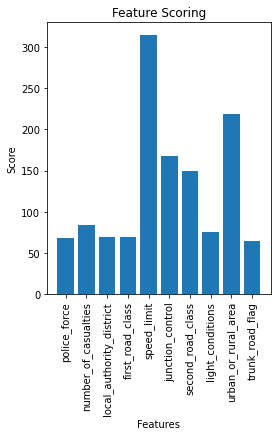

In [91]:
# Declare image size
plt.figure(figsize=(4,5))

# Plot feature scores
plt.bar(names, scores)
plt.xticks(rotation = 'vertical')

# Label graph
plt.ylabel("Score")
plt.xlabel("Features")
plt.title("Feature Scoring")

# Display graph
plt.show()


Begin Classification, split your data into train and test

In [92]:
# Storing features in variable x
x = accident_2020_df_res_num

# Storing target in variable y
y = accident_2020_label_res

# Split Data set into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale x_train, x_test 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Create a function to stack models 

In [93]:
# Function for model stacking
def get_stacking():
    
    level0 = []
    level0.append(('dtree', DecisionTreeClassifier(min_samples_leaf = 100)))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('bayes', GaussianNB()))
    
    level1 = LogisticRegression()
    
    model  = StackingClassifier(estimators = level0, final_estimator = level1)
    
    return model

Create a function to incorporate each of the individual models and the stacked model. Their performances will be measured individually

In [94]:
# Function to incorporate all models
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier(min_samples_leaf = 100)
    models['knn'] = KNeighborsClassifier()
    models['bayes'] = GaussianNB()
    models['Stacked'] = get_stacking()
    models['logisticregression'] = LogisticRegression()
    return models

Create a function to evaluate models, apply cross validation

In [95]:
# Function to evaluate model
def evaluate_model(model,x,y):
    
    cv = RepeatedStratifiedKFold(
            n_splits = 10,
            n_repeats = 3,
            random_state = 42)
    
    scores = cross_val_score(
                model,x,y,
                scoring = "accuracy",
                cv = cv, error_score = 'raise'
                )
    
    return scores

Get the respective models

In [96]:
# Get model
models = get_models()

Validate the models.

In [97]:
# Create variable names to store model names and results
names = []
results = [] 

# Validate the models
for name, model in models.items():
    x = accident_2020_df_res_num
    y = accident_2020_label_res 
    scores = evaluate_model(model,x_train,y_train)
    names.append(name)
    results.append(scores)
    print(f"{name}: Mean {mean(scores):.2f} STD {std(scores):.3f}")

dtree: Mean 0.69 STD 0.021
knn: Mean 0.65 STD 0.025
bayes: Mean 0.60 STD 0.018
Stacked: Mean 0.69 STD 0.019
logisticregression: Mean 0.68 STD 0.026


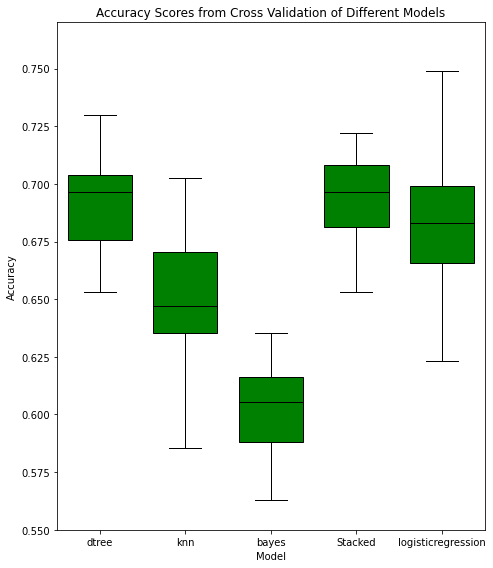

In [98]:
# Delcare fig Size
plt.figure(figsize=(7,8))

# Plot result of each model
plt.boxplot(results, 
            labels=names, 
            patch_artist=True,
            widths=0.75,       
            medianprops={'color': 'black'},
            boxprops=dict(facecolor='green'),
            )

# Label graph
plt.title("Accuracy Scores from Cross Validation of Different Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0.55, 0.77)  # Set y-axis range
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

Now evaluate the model and test its predictive capability

In [99]:
# Test the predictive capacity of all models
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("=========",name,"==========")
    print(classification_report(y_test,y_pred))
    

========= dtree ==========
              precision    recall  f1-score   support

       False       0.71      0.57      0.64       277
        True       0.65      0.77      0.70       280

    accuracy                           0.67       557
   macro avg       0.68      0.67      0.67       557
weighted avg       0.68      0.67      0.67       557

========= knn ==========
              precision    recall  f1-score   support

       False       0.67      0.66      0.67       277
        True       0.67      0.68      0.68       280

    accuracy                           0.67       557
   macro avg       0.67      0.67      0.67       557
weighted avg       0.67      0.67      0.67       557

========= bayes ==========
              precision    recall  f1-score   support

       False       0.72      0.32      0.44       277
        True       0.56      0.88      0.69       280

    accuracy                           0.60       557
   macro avg       0.64      0.60      0.56      

Display the confusion matrix of the highest performing model.

That is the Logistic Regression Model.

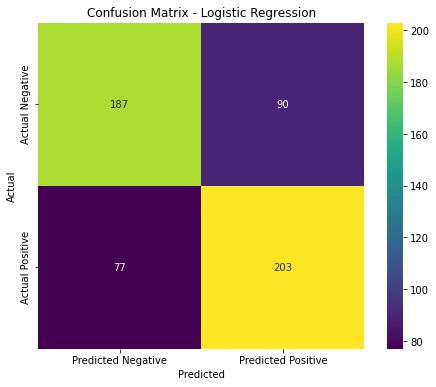

In [100]:
# Produce confusion matrix report
cm = confusion_matrix(y_test,y_pred)

# Specify confusion matrix size
plt.figure(figsize=(8, 6))

# Plot confusion matrix graph
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

# Lable confusion matrix
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()